## Anomaly Detection SOM Experiment

Insert Code wherever represented with "#***************#"

In [2]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=2a0e856bceb6dd07e7fa5cb6743eb41429dab27e893eb614dbb9eb9e673862b0
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Minisom library and module is used for performing Self Organizing Maps
from minisom import MiniSom

In [4]:
# Loading Data
data = pd.read_csv('/content/Credit_Card_Applications.csv')

# X
data

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [5]:
# Shape of the data:
"""
    Write Code to display shape of data
"""
#********************#
data.shape

(690, 16)

In [6]:
# Info of the data:
"""
    Write Code to display information of data using inbuilt info function
"""
#********************#
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [7]:
# Defining X variables for the input of SOM
X = data.iloc[:, 1:14].values
y = data.iloc[:, -1].values

# X variables:
"""
    Convert X variable into a pandas DataFrame
"""
#********************#
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,22.08,11.460,2.0,4.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,100.0
1,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0
2,0.0,29.58,1.750,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0
3,0.0,21.67,11.500,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0
4,1.0,20.17,8.170,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,31.57,10.500,2.0,14.0,4.0,6.500,1.0,0.0,0.0,0.0,2.0,0.0
686,1.0,20.67,0.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,0.0
687,0.0,18.83,9.540,2.0,6.0,4.0,0.085,1.0,0.0,0.0,0.0,2.0,100.0
688,0.0,27.42,14.500,2.0,14.0,8.0,3.085,1.0,1.0,1.0,0.0,2.0,120.0


In [9]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))

"""
    apply fit_transform using the created MinMaxScaler sc on variable X
"""
X = sc.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,0.267970,0.375000,0.5,1.000000,0.375,0.228070,1.0,0.0,0.000000,0.0,0.5,0.00
686,1.0,0.104060,0.014821,0.5,0.538462,0.375,0.004386,0.0,0.0,0.000000,0.0,0.5,0.00
687,0.0,0.076391,0.340714,0.5,0.384615,0.375,0.002982,1.0,0.0,0.000000,0.0,0.5,0.05
688,0.0,0.205564,0.517857,0.5,1.000000,0.875,0.108246,1.0,1.0,0.014925,0.0,0.5,0.06


In [10]:
# Set the hyper parameters
som_grid_rows = 10
som_grid_columns = 10
iterations = 20000
sigma = 1
learning_rate = 0.5

# define SOM:
"""
    Create MiniSom Model using above hyperparemeters with
    x = som_grid_rows
    y = som_grid_columns
    sigma = sigma
    input_len = 13
    and learning_rate = learning_rate
"""
som = MiniSom(x= som_grid_rows, y=som_grid_columns, input_len=13, sigma=sigma, learning_rate=learning_rate)

In [13]:
# Initializing the weights
som.random_weights_init(X)

# Training
"""
    Train som model using train_random on varible X for above mentioned iterations
"""
#********************#
som.train_random(X, num_iteration=iterations)
# Returns the distance map from the weights:
som.distance_map()

array([[0.3122531 , 0.44283955, 0.52509342, 0.46198781, 0.42603231,
        0.27845532, 0.37321428, 0.37542949, 0.28047398, 0.18339528],
       [0.51507454, 0.83309673, 0.67928199, 0.76146576, 0.56861392,
        0.61059629, 0.7301102 , 0.67451594, 0.45941672, 0.22271081],
       [0.40795415, 0.6917455 , 0.68042267, 0.63026905, 0.50197552,
        0.52116001, 0.8169081 , 1.        , 0.47370412, 0.29093454],
       [0.32647548, 0.6718503 , 0.75911462, 0.73793285, 0.78347883,
        0.60043746, 0.73647351, 0.93235589, 0.55166997, 0.28532426],
       [0.37133556, 0.71955765, 0.69733954, 0.92031183, 0.68464387,
        0.55777086, 0.9126945 , 0.63006209, 0.62563942, 0.30580649],
       [0.45939083, 0.60914534, 0.7411742 , 0.78246306, 0.61370504,
        0.46000636, 0.59607571, 0.61561983, 0.68086628, 0.39898001],
       [0.39852006, 0.58197439, 0.56209006, 0.94662914, 0.71242071,
        0.54732016, 0.63558998, 0.54063379, 0.62315507, 0.43100418],
       [0.42554632, 0.74297128, 0.8605454

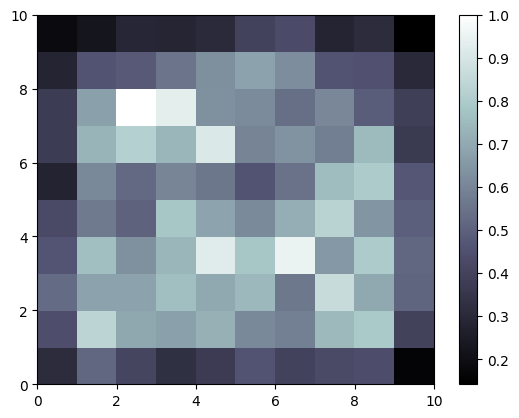

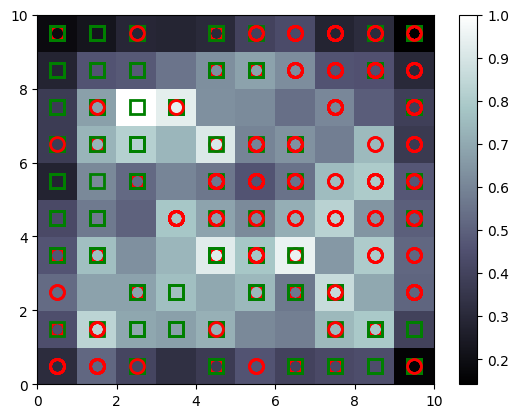

In [14]:
from pylab import plot, axis, show, pcolor, colorbar, bone

bone()
pcolor(som.distance_map().T)       # Distance map as background
colorbar()
show()
bone()
pcolor(som.distance_map().T)
colorbar() #gives legend

markers = ['o', 's']                 # if the observation is fraud then red circular color or else green square
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)

show()

In [16]:
"""
    Write code to store som win_map into a variable names mappings
"""
mappings =som.win_map(X)
print(mappings)
mappings.keys()
"""
    Write code to find the length of mapping.keys()
"""
#********************#
len(mappings.keys())

defaultdict(<class 'list'>, {(5, 4): [array([1.        , 0.12526316, 0.40928571, 0.5       , 0.23076923,
       0.375     , 0.05561404, 0.        , 0.        , 0.        ,
       1.        , 0.5       , 0.05      ]), array([1.        , 0.20556391, 0.44642857, 0.5       , 0.38461538,
       0.5       , 0.00877193, 0.        , 0.        , 0.        ,
       1.        , 0.5       , 0.36      ]), array([1.        , 0.05639098, 0.78571429, 1.        , 0.        ,
       0.75      , 0.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 0.225     ]), array([1.        , 0.19428571, 0.52089286, 0.5       , 0.15384615,
       0.5       , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.5       , 0.089     ])], (9, 7): [array([0.        , 0.13413534, 0.25      , 0.5       , 0.53846154,
       0.375     , 0.00578947, 0.        , 0.        , 0.        ,
       0.        , 0.5       , 0.08      ]), array([0.        , 0.21684211, 0.02089286, 0.5       , 0.

81

In [17]:
mappings[(9,8)]
frauds = np.concatenate((mappings[(0,9)], mappings[(8,9)]), axis = 0)
frauds

array([[1.        , 0.21052632, 0.02089286, 0.        , 0.92307692,
        0.375     , 0.00877193, 1.        , 1.        , 0.02985075,
        0.        , 0.5       , 0.13      ],
       [1.        , 0.13413534, 0.05660714, 0.        , 0.61538462,
        0.375     , 0.10824561, 1.        , 1.        , 0.08955224,
        0.        , 0.5       , 0.04      ],
       [1.        , 0.33954887, 0.07589286, 0.        , 0.61538462,
        0.375     , 0.00298246, 1.        , 1.        , 0.01492537,
        0.        , 0.5       , 0.025     ],
       [1.        , 0.11909774, 0.04160714, 0.        , 0.23076923,
        0.375     , 0.0877193 , 1.        , 1.        , 0.01492537,
        0.        , 0.5       , 0.09      ],
       [1.        , 0.19428571, 0.09678571, 0.        , 0.92307692,
        0.375     , 0.18421053, 1.        , 1.        , 0.01492537,
        0.        , 0.5       , 0.1055    ],
       [1.        , 0.39353383, 0.01928571, 0.        , 0.38461538,
        0.375     , 0.01754

In [21]:
# the list of customers who are frauds:
"""
    Convert he fraud customers back into original values using Standard Scaler(sc) inverse_transform and store into a variable named frauds1
"""
frauds1 = sc.inverse_transform(frauds)
pd.DataFrame(frauds1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,27.75,0.585,1.0,13.0,4.0,0.250,1.0,1.0,2.0,0.0,2.0,260.0
1,1.0,22.67,1.585,1.0,9.0,4.0,3.085,1.0,1.0,6.0,0.0,2.0,80.0
2,1.0,36.33,2.125,1.0,9.0,4.0,0.085,1.0,1.0,1.0,0.0,2.0,50.0
3,1.0,21.67,1.165,1.0,4.0,4.0,2.500,1.0,1.0,1.0,0.0,2.0,180.0
4,1.0,26.67,2.710,1.0,13.0,4.0,5.250,1.0,1.0,1.0,0.0,2.0,211.0
5,1.0,39.92,0.540,1.0,6.0,4.0,0.500,1.0,1.0,3.0,0.0,2.0,200.0
6,1.0,48.58,0.205,1.0,4.0,4.0,0.250,1.0,1.0,11.0,0.0,2.0,380.0
7,1.0,37.58,0.000,2.0,8.0,4.0,0.000,0.0,0.0,0.0,0.0,3.0,184.0
8,1.0,23.17,0.000,2.0,8.0,4.0,0.000,0.0,0.0,0.0,0.0,3.0,184.0
9,1.0,34.58,0.000,2.0,8.0,4.0,0.000,0.0,0.0,0.0,0.0,3.0,184.0
